# Explore here

MODULO PARA DETECTAR LA CODIFICACION DEL ARCHIVO CSV

In [8]:
import chardet

# Detectar la codificación
with open('../data/raw/products_utf8.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result['encoding'])

utf-8


MODULO PARA PASAR EL CSV A UTF-8

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el dataset
file_path = '../data/raw/products.csv'
df = pd.read_csv(file_path, encoding='MacRoman')


output_file_path = '../data/raw/products_utf8.csv'

# Guardar el archivo convertido
df.to_csv(output_file_path, encoding='utf-8', index=False)




C:\Users\pablo\AppData\Local\Temp\ipykernel_308\2378698660.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='MacRoman')


PermissionError: [Errno 13] Permission denied: '../data/raw/products_utf8.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el dataset
file_path = '../data/raw/products_utf8.csv'
data = pd.read_csv(file_path, encoding='utf-8')


C:\Users\pablo\AppData\Local\Temp\ipykernel_18524\872481049.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='utf-8')


In [3]:
# Análisis descriptivo básico
shape = data.shape
info = data.info()
describe = data.describe()

(shape, info, describe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101166 entries, 0 to 101165
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            101166 non-null  int64  
 1   snapshot_id           101166 non-null  int64  
 2   product_list_name     101166 non-null  int64  
 3   product_name          101166 non-null  int64  
 4   url                   101166 non-null  int64  
 5   ingredients_text      79387 non-null   object 
 6   energy_per_100        37719 non-null   object 
 7   fat_per_100           62214 non-null   object 
 8   saturates_per_100     77681 non-null   object 
 9   salt_per_100          62134 non-null   object 
 10  sugar_per_100         78759 non-null   object 
 11  carbohydrate_per_100  79130 non-null   object 
 12  protein_per_100       62812 non-null   object 
 13  fibre_per_100         59796 non-null   object 
 14  serving               38287 non-null   object 
 15  

((101166, 19),
 None,
          product_id    snapshot_id  product_list_name   product_name  \
 count  1.011660e+05  101166.000000      101166.000000  101166.000000   
 mean   1.193381e+07    1077.428237       44729.236720   45275.392157   
 std    2.912246e+04       1.721046       25749.834926   26086.680643   
 min    1.188327e+07    1075.000000           1.000000       1.000000   
 25%    1.190881e+07    1076.000000       22721.250000   22990.250000   
 50%    1.193396e+07    1077.000000       44466.500000   44951.500000   
 75%    1.195897e+07    1079.000000       67589.750000   68308.000000   
 max    1.198418e+07    1082.000000       89366.000000   90574.000000   
 
                  url  serving_data       Retailer  
 count  101166.000000           0.0  101166.000000  
 mean    50515.857867           NaN    3863.239626  
 std     29172.727303           NaN    2247.585681  
 min         6.000000           NaN     684.000000  
 25%     24945.250000           NaN    2238.000000  
 

Pruebas limpieza variable ingredients_txt

GENERACION DE DATAFRAME CON 20 INGREDIENTES MAXIMO

In [4]:
import pandas as pd
import re

# Cargar el dataset
file_path = '../data/raw/products_utf8.csv'  # Cambia esta ruta por la ubicación de tu archivo
data = pd.read_csv(file_path, encoding='utf-8')

# Función para limpiar y separar ingredientes
def clean_and_tokenize(ingredients):
    # Convertir a texto, minúsculas
    ingredients = str(ingredients).lower()
    # Eliminar paréntesis, porcentajes y caracteres especiales irrelevantes
    ingredients = re.sub(r'\(.*?\)|\d+%|[\.\%\!]', '', ingredients)
    # Reemplazar separadores por coma
    ingredients = re.sub(r'\s*(,|y|and|;|:|\|)\s*', ',', ingredients)
    # Dividir en lista de ingredientes
    return [item.strip() for item in ingredients.split(',') if item.strip()]

# Aplicar la función a la columna 'ingredients_text'
data['cleaned_ingredients'] = data['ingredients_text'].apply(clean_and_tokenize)

# Crear una nueva columna 'saturado' para filas con más de 50 ingredientes
data['saturado'] = data['cleaned_ingredients'].apply(lambda x: 1 if len(x) > 20 else 0)

# Limitar los ingredientes a 20 columnas
ingredients_columns = pd.DataFrame(
    data['cleaned_ingredients'].apply(lambda x: x[:20]).tolist(),
    index=data.index
)

# Renombrar las columnas
ingredients_columns.columns = [f'ingredient_{i+1}' for i in range(ingredients_columns.shape[1])]

# Concatenar las nuevas columnas con el DataFrame original
result_data = pd.concat([data, ingredients_columns], axis=1)

# Guardar el resultado en un archivo Excel (opcional)
result_data.to_excel('ingredientes_procesados_limitados20.xlsx', index=False)

# Mostrar una parte del resultado
print(result_data.head())

C:\Users\pablo\AppData\Local\Temp\ipykernel_18524\866807237.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='utf-8')


   product_id  snapshot_id  product_list_name  product_name    url  \
0    11891023         1075              10892         11047  81696   
1    11891024         1075              70699         71680  83821   
2    11891025         1075              70002         70928  85460   
3    11891026         1075              31053         31483  83377   
4    11891027         1075              75024         76105  77507   

              ingredients_text energy_per_100 fat_per_100 saturates_per_100  \
0                      Cheddar            NaN       34.9g             21.7g   
1  Butter (Milk), Salt (1.5%).            NaN       82.2g             52.1g   
2               Salmon (Fish).            NaN       12.0g              1.6g   
3         Clementine, Mandarin            NaN        0.2g                0g   
4                      Avocado            NaN       19.5g              4.1g   

  salt_per_100  ... ingredient_11 ingredient_12 ingredient_13 ingredient_14  \
0         1.8g  ...      

FUNCION CONTAR FRECUENCIA INGREDIENTES

In [5]:
def contar_frecuencia_ingredientes(df, start_column='ingredient_1', end_column='ingredient_20'):
    """
    Función para contar la frecuencia de cada ingrediente en un DataFrame.

    Args:
        df (pd.DataFrame): DataFrame que contiene las columnas de ingredientes.
        start_column (str): Nombre de la primera columna de ingredientes.
        end_column (str): Nombre de la última columna de ingredientes.

    Returns:
        pd.DataFrame: DataFrame con los ingredientes y su frecuencia, ordenado de mayor a menor.
    """
    # Seleccionar las columnas de ingredientes
    ingredient_columns = df.loc[:, start_column:end_column]
    
    # Combinar todos los ingredientes en una única serie
    all_ingredients = ingredient_columns.stack()
    
    # Contar las frecuencias
    ingredient_counts = all_ingredients.value_counts()
    
    # Convertir a DataFrame para mejor visualización
    result = ingredient_counts.reset_index()
    result.columns = ['Ingrediente', 'Frecuencia']
    
    return result

# Llamar a la función con el DataFrame procesado
frecuencia_ingredientes = contar_frecuencia_ingredientes(result_data)

# Guardar el resultado en un archivo CSV (opcional)
frecuencia_ingredientes.to_csv('frecuencia_ingredientes.csv', index=False)


# Mostrar todos los ingredientes ordenados
print(frecuencia_ingredientes)
#print(frecuencia_ingredientes.head(10))
# Calcular el número de ingredientes diferentes
num_ingredientes_diferentes = frecuencia_ingredientes.shape[0]
print(f"Número de ingredientes diferentes: {num_ingredientes_diferentes}")

                           Ingrediente  Frecuencia
0                                 salt       36585
1                                sugar       33349
2                                water       29025
3                                  nan       21779
4                                  rup       14930
...                                ...         ...
37815                          water]}           1
37816  tomato sauce 37 [tomato pulp 26           1
37817                     fishsauce 53           1
37818                     white wine 0           1
37819                         sauce 38           1

[37820 rows x 2 columns]
Número de ingredientes diferentes: 37820


C:\Users\pablo\AppData\Local\Temp\ipykernel_18524\136658941.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


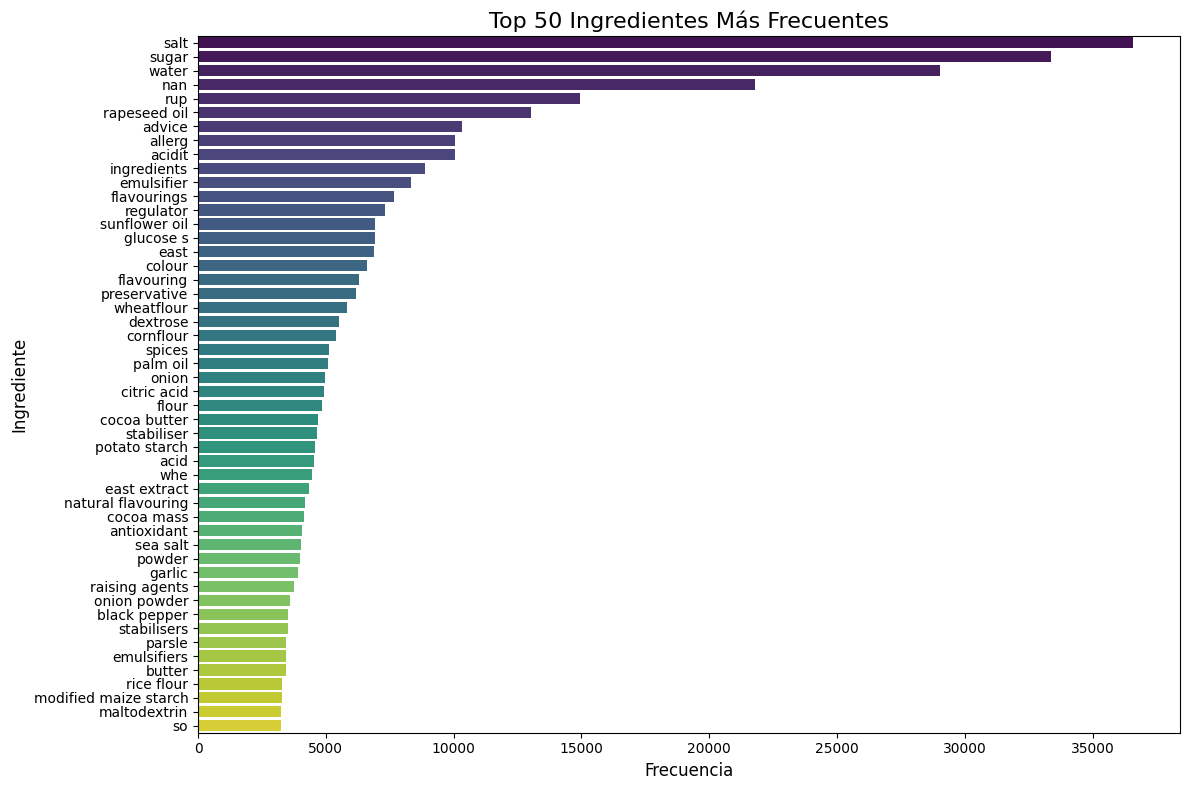

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionar los 30 ingredientes más frecuentes
top_30_ingredientes = frecuencia_ingredientes.head(50)

# Crear la gráfica
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_30_ingredientes,
    x='Frecuencia',
    y='Ingrediente',
    palette='viridis'
)
plt.title('Top 50 Ingredientes Más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Ingrediente', fontsize=12)
plt.tight_layout()
plt.show()

Función para identificar ingredientes falsos.

In [7]:
def identificar_ingredientes_reales(lista_ingredientes):
    """
    Identifica ingredientes reales y separa los valores no deseados.

    Args:
        lista_ingredientes (pd.DataFrame): DataFrame con ingredientes y sus frecuencias.

    Returns:
        pd.DataFrame: DataFrame con ingredientes reales y falsos etiquetados.
    """
    # Criterios para marcar como falso
    def es_falso(ingrediente):
        # Valores vacíos, nulos o muy cortos
        if not ingrediente or ingrediente in ['nan', '', 'none'] or len(ingrediente) < 3:
            return True
        # Palabras genéricas no relacionadas con alimentos
        palabras_no_deseadas = {'advice', 'info', 'data', 'unknown'}
        if ingrediente in palabras_no_deseadas:
            return True
        # Caracteres especiales
        if re.search(r'[^a-zA-Záéíóúñ\s]', ingrediente):
            return True
        # Caso contrario, se asume que es real
        return False

    # Aplicar la regla de clasificación
    lista_ingredientes['EsFalso'] = lista_ingredientes['Ingrediente'].apply(es_falso)

    return lista_ingredientes

# Identificar ingredientes reales y falsos
ingredientes_clasificados = identificar_ingredientes_reales(frecuencia_ingredientes)

# Filtrar solo los ingredientes reales
ingredientes_reales = ingredientes_clasificados[ingredientes_clasificados['EsFalso'] == False]

# Filtrar ingredientes falsos para revisión
ingredientes_falsos = ingredientes_clasificados[ingredientes_clasificados['EsFalso'] == True]

# Guardar los resultados en archivos separados (opcional)
#ingredientes_reales.to_csv('ingredientes_reales.csv', index=False)
#ingredientes_falsos.to_csv('ingredientes_falsos.csv', index=False)

# Mostrar ejemplos
print("Ingredientes reales (top 10):")
print(ingredientes_reales.head(10))

print("\nIngredientes falsos (top 10):")
print(ingredientes_falsos.head(10))

Ingredientes reales (top 10):
     Ingrediente  Frecuencia  EsFalso
0           salt       36585    False
1          sugar       33349    False
2          water       29025    False
4            rup       14930    False
5   rapeseed oil       13015    False
7         allerg       10040    False
8         acidit       10034    False
9    ingredients        8885    False
10    emulsifier        8345    False
11   flavourings        7684    False

Ingredientes falsos (top 10):
            Ingrediente  Frecuencia  EsFalso
3                   nan       21779     True
6                advice       10314     True
49                   so        3247     True
51        garlic purã©e        2751     True
61                   er        2326     True
70        tomato purã©e        2037     True
81   glucose-fructose s        1761     True
105                  gl        1394     True
118                  th        1221     True
119                  me        1215     True


Comparación entre ingredientes totales e ingredientes falsos para ver como esta funcionando el algoritmo

In [8]:
# Comparar ingredientes diferentes y los considerados falsos
# Contar el número total de ingredientes diferentes
num_ingredientes_diferentes = ingredientes_clasificados.shape[0]

# Contar el número de ingredientes reales y falsos
num_ingredientes_reales = ingredientes_clasificados[ingredientes_clasificados['EsFalso'] == False].shape[0]
num_ingredientes_falsos = ingredientes_clasificados[ingredientes_clasificados['EsFalso'] == True].shape[0]

# Crear un resumen comparativo
comparacion = pd.DataFrame({
    'Categoría': ['Ingredientes Totales', 'Ingredientes Reales', 'Ingredientes Falsos'],
    'Cantidad': [num_ingredientes_diferentes, num_ingredientes_reales, num_ingredientes_falsos]
})

# Mostrar la comparación
print(comparacion)

# Guardar la comparación en un archivo CSV (opcional)
comparacion.to_csv('comparacion_ingredientes.csv', index=False)

              Categoría  Cantidad
0  Ingredientes Totales     37820
1   Ingredientes Reales     22779
2   Ingredientes Falsos     15041


Cuantos productos tienen al menos 1 ingrediente falso.

In [9]:
def analizar_productos_con_ingredientes_falsos_con_marca(result_data, ingredientes_falsos):
    """
    Analiza cuántos productos contienen ingredientes falsos y agrega una columna 'tiene_ingrediente_falso'.

    Args:
        result_data (pd.DataFrame): DataFrame con los productos e ingredientes.
        ingredientes_falsos (pd.DataFrame): DataFrame con los ingredientes clasificados como falsos.

    Returns:
        pd.DataFrame: DataFrame con la columna adicional 'tiene_ingrediente_falso'.
        dict: Diccionario con el número de productos con y sin ingredientes falsos.
    """
    # Obtener la lista de ingredientes catalogados como falsos
    ingredientes_falsos_set = set(ingredientes_falsos['Ingrediente'])

    # Seleccionar las columnas de ingredientes
    ingredient_columns = result_data.loc[:, 'ingredient_1':'ingredient_20']

    # Comprobar si cada producto contiene al menos un ingrediente falso
    def contiene_ingrediente_falso(row):
        for ingrediente in row:
            if pd.notna(ingrediente) and ingrediente in ingredientes_falsos_set:
                return True
        return False

    # Crear una nueva columna 'tiene_ingrediente_falso'
    result_data['tiene_ingrediente_falso'] = ingredient_columns.apply(contiene_ingrediente_falso, axis=1).astype(int)

    # Calcular los totales
    total_productos = len(result_data)
    productos_con_falsos_count = result_data['tiene_ingrediente_falso'].sum()
    productos_sin_falsos_count = total_productos - productos_con_falsos_count

    resumen = {
        "Total Productos": total_productos,
        "Productos con Ingredientes Falsos": productos_con_falsos_count,
        "Productos sin Ingredientes Falsos": productos_sin_falsos_count
    }

    return result_data, resumen

# Llamar a la función con los datos
result_data_actualizado, resumen = analizar_productos_con_ingredientes_falsos_con_marca(result_data, ingredientes_falsos)

# Mostrar resultados
print(f"Total de productos: {resumen['Total Productos']}")
print(f"Productos con ingredientes falsos: {resumen['Productos con Ingredientes Falsos']}")
print(f"Productos sin ingredientes falsos: {resumen['Productos sin Ingredientes Falsos']}")

# Guardar el DataFrame actualizado en un archivo CSV
# result_data_actualizado.to_csv('productos_con_marca_ingredientes_falsos.csv', index=False)
# print("Archivo 'productos_con_marca_ingredientes_falsos.csv' generado con éxito.")

Total de productos: 101166
Productos con ingredientes falsos: 68045
Productos sin ingredientes falsos: 33121


Frecuencia 1

In [15]:
# Identificar ingredientes con frecuencia igual a 1
ingredientes_frecuencia_1 = frecuencia_ingredientes[frecuencia_ingredientes['Frecuencia'] == 1]

# Contar el número de ingredientes con frecuencia 1
num_ingredientes_frecuencia_1 = ingredientes_frecuencia_1.shape[0]

print(f"Número de ingredientes con frecuencia 1: {num_ingredientes_frecuencia_1}")

Número de ingredientes con frecuencia 1: 16821


Analisis de frecuencias para ver a partir de cuantos vamos a desechar.

Estadísticas básicas de las frecuencias de ingredientes:
count    37820.000000
mean        25.648281
std        395.201664
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      36585.000000
Name: Frecuencia, dtype: float64

Percentiles de las frecuencias:
0.05     1.0
0.25     1.0
0.50     2.0
0.75     5.0
0.95    42.0
Name: Frecuencia, dtype: float64


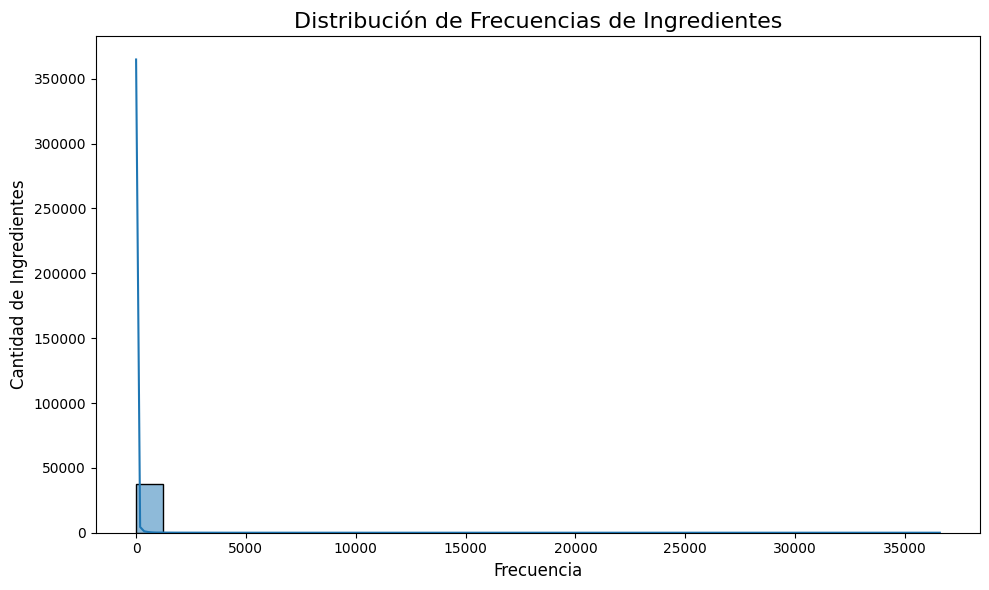

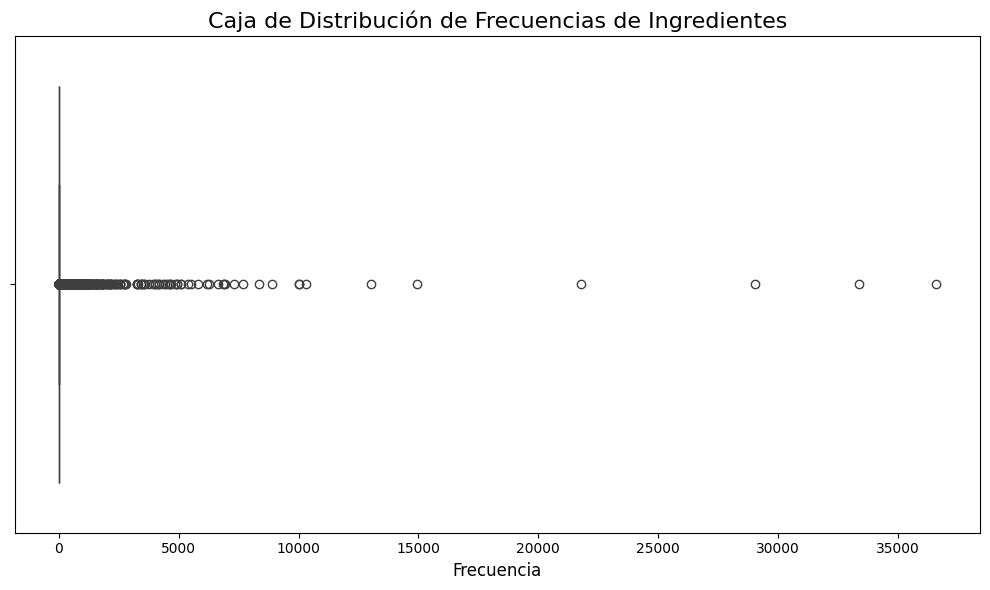


Número de ingredientes con frecuencia <= percentil 5% (1.0): 16821

Ejemplo de ingredientes infrecuentes:
                       Ingrediente  Frecuencia  EsFalso
20999            pecorino cheese 1           1     True
21000  roast chicken breast fillet           1    False
21001          chilli pepperallerg           1    False
21002     mascarpone cream  [water           1     True
21003                        e330)           1     True


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas de las frecuencias
frecuencia_stats = frecuencia_ingredientes['Frecuencia'].describe()

print("Estadísticas básicas de las frecuencias de ingredientes:")
print(frecuencia_stats)

# Percentiles para analizar ingredientes infrecuentes
percentiles = frecuencia_ingredientes['Frecuencia'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print("\nPercentiles de las frecuencias:")
print(percentiles)

# Visualización de la distribución de frecuencias
plt.figure(figsize=(10, 6))
sns.histplot(frecuencia_ingredientes['Frecuencia'], bins=30, kde=True)
plt.title('Distribución de Frecuencias de Ingredientes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Cantidad de Ingredientes', fontsize=12)
plt.tight_layout()
plt.show()

# Visualización con gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=frecuencia_ingredientes['Frecuencia'])
plt.title('Caja de Distribución de Frecuencias de Ingredientes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

# Identificar ingredientes infrecuentes (por debajo del percentil 5%)
umbral_inferior = percentiles[0.05]
ingredientes_infrecuentes = frecuencia_ingredientes[frecuencia_ingredientes['Frecuencia'] <= umbral_inferior]

print(f"\nNúmero de ingredientes con frecuencia <= percentil 5% ({umbral_inferior}): {ingredientes_infrecuentes.shape[0]}")

# Mostrar una muestra de los ingredientes infrecuentes
print("\nEjemplo de ingredientes infrecuentes:")
print(ingredientes_infrecuentes.head())

Calculamos el umbral de corte de los ingredientes.

In [11]:
def calcular_atipicos_aptos(frecuencia_ingredientes, result_data):
    """
    Identifica los ingredientes aptos según los valores atípicos superiores en la distribución de frecuencias
    y calcula el tamaño estimado del dataset final.

    Args:
        frecuencia_ingredientes (pd.DataFrame): DataFrame con ingredientes y sus frecuencias.
        result_data (pd.DataFrame): DataFrame original con los productos e ingredientes.

    Returns:
        dict: Resultados con el número de ingredientes aptos y el tamaño estimado del dataset final.
    """
    # Calcular el rango intercuartil (IQR)
    Q1 = frecuencia_ingredientes['Frecuencia'].quantile(0.25)
    Q3 = frecuencia_ingredientes['Frecuencia'].quantile(0.75)
    IQR = Q3 - Q1

    # Determinar el umbral para valores atípicos superiores
    umbral_superior = Q3 + 1.5 * IQR

    # Identificar ingredientes aptos (valores atípicos superiores)
    ingredientes_aptos = frecuencia_ingredientes[frecuencia_ingredientes['Frecuencia'] > umbral_superior]
    ingredientes_aptos_set = set(ingredientes_aptos['Ingrediente'])

    # Calcular el tamaño estimado del dataset final
    filas_afectadas = result_data.loc[:, 'ingredient_1':'ingredient_20'].apply(
        lambda row: any(ingrediente not in ingredientes_aptos_set for ingrediente in row if pd.notna(ingrediente)),
        axis=1
    )

    filas_restantes = len(result_data) - filas_afectadas.sum()

    return {
        "Ingredientes Aptos": len(ingredientes_aptos),
        "Filas Estimadas Restantes": filas_restantes,
        "Ingredientes Seleccionados": ingredientes_aptos['Ingrediente'].tolist()
    }

# Llamar a la función
resultados = calcular_atipicos_aptos(frecuencia_ingredientes, result_data)

# Mostrar resultados
print(f"Ingredientes aptos (valores atípicos superiores): {resultados['Ingredientes Aptos']}")
print(f"Tamaño estimado del dataset final: {resultados['Filas Estimadas Restantes']}")
print("\nEjemplo de ingredientes aptos (primeros 10):")
print(resultados['Ingredientes Seleccionados'][:10])


Ingredientes aptos (valores atípicos superiores): 4801
Tamaño estimado del dataset final: 61556

Ejemplo de ingredientes aptos (primeros 10):
['salt', 'sugar', 'water', 'nan', 'rup', 'rapeseed oil', 'advice', 'allerg', 'acidit', 'ingredients']


Para descartar aquellos ingredientes con frecuencias bajas, me quedo con los outliers de los ingredientes diferentes.

In [22]:
def calcular_atipicos_aptos(frecuencia_ingredientes, result_data):
    """
    Identifica los ingredientes aptos según los valores atípicos superiores en la distribución de frecuencias
    y calcula el tamaño estimado del dataset final.

    Args:
        frecuencia_ingredientes (pd.DataFrame): DataFrame con ingredientes y sus frecuencias.
        result_data (pd.DataFrame): DataFrame original con los productos e ingredientes.

    Returns:
        dict: Resultados con el número de ingredientes aptos y el tamaño estimado del dataset final.
    """
    # Calcular el rango intercuartil (IQR)
    Q1 = frecuencia_ingredientes['Frecuencia'].quantile(0.25)
    Q3 = frecuencia_ingredientes['Frecuencia'].quantile(0.75)
    IQR = Q3 - Q1

    # Determinar el umbral para valores atípicos superiores
    umbral_superior = Q3 + 1.5 * IQR

    # Identificar ingredientes aptos (valores atípicos superiores)
    ingredientes_aptos = frecuencia_ingredientes[frecuencia_ingredientes['Frecuencia'] > umbral_superior]
    ingredientes_aptos_set = set(ingredientes_aptos['Ingrediente'])

    # Calcular el tamaño estimado del dataset final
    filas_afectadas = result_data.loc[:, 'ingredient_1':'ingredient_20'].apply(
        lambda row: any(ingrediente not in ingredientes_aptos_set for ingrediente in row if pd.notna(ingrediente)),
        axis=1
    )

    filas_restantes = len(result_data) - filas_afectadas.sum()

    return {
        "Ingredientes Aptos": len(ingredientes_aptos),
        "Filas Estimadas Restantes": filas_restantes,
        "Ingredientes Seleccionados": ingredientes_aptos['Ingrediente'].tolist()
    }

# Llamar a la función
resultados = calcular_atipicos_aptos(frecuencia_ingredientes, result_data)

# Mostrar resultados
print(f"Ingredientes aptos (valores atípicos superiores): {resultados['Ingredientes Aptos']}")
print(f"Tamaño estimado del dataset final: {resultados['Filas Estimadas Restantes']}")
print("\nEjemplo de ingredientes aptos (primeros 10):")
print(resultados['Ingredientes Seleccionados'][:10])


Ingredientes aptos (valores atípicos superiores): 4801
Tamaño estimado del dataset final: 61556

Ejemplo de ingredientes aptos (primeros 10):
['salt', 'sugar', 'water', 'nan', 'rup', 'rapeseed oil', 'advice', 'allerg', 'acidit', 'ingredients']


Función para calcular filas con ingredientes aptos

In [26]:
def mostrar_primeros_aptos(resultados, frecuencia_ingredientes, top_n=30):
    """
    Muestra los primeros ingredientes aptos y sus frecuencias.

    Args:
        resultados (dict): Resultados del análisis con los ingredientes aptos.
        frecuencia_ingredientes (pd.DataFrame): DataFrame con las frecuencias de los ingredientes.
        top_n (int): Número de ingredientes a mostrar.

    Returns:
        pd.DataFrame: DataFrame con los ingredientes y sus frecuencias.
    """
    # Obtener la lista de ingredientes aptos
    ingredientes_aptos = resultados['Ingredientes Seleccionados']
    
    # Filtrar las frecuencias para los ingredientes aptos
    ingredientes_aptos_df = frecuencia_ingredientes[frecuencia_ingredientes['Ingrediente'].isin(ingredientes_aptos)]
    
    # Seleccionar los top_n ingredientes aptos
    ingredientes_top = ingredientes_aptos_df.head(top_n)
    
    return ingredientes_top

# Llamar a la función para mostrar los 30 primeros ingredientes aptos
ingredientes_top_30 = mostrar_primeros_aptos(resultados, frecuencia_ingredientes, top_n=30)

# Mostrar los resultados
print(ingredientes_top_30)


      Ingrediente  Frecuencia
0            salt       36585
1           sugar       33349
2           water       29025
3             nan       21779
4             rup       14930
5    rapeseed oil       13015
6          advice       10314
7          allerg       10040
8          acidit       10034
9     ingredients        8885
10     emulsifier        8345
11    flavourings        7684
12      regulator        7308
13  sunflower oil        6914
14      glucose s        6912
15           east        6871
16         colour        6626
17     flavouring        6282
18   preservative        6163
19     wheatflour        5816
20       dextrose        5516
21      cornflour        5410
22         spices        5109
23       palm oil        5103
24          onion        4951
25    citric acid        4930
26          flour        4854
27   cocoa butter        4688
28     stabiliser        4644
29  potato starch        4581


In [27]:
def calcular_filas_con_ingredientes_aptos(result_data, resultados, top_n=100):
    """
    Calcula cuántas filas quedarían en el dataset final si se consideran solo los productos 
    que contienen al menos uno de los top_n ingredientes aptos.

    Args:
        result_data (pd.DataFrame): DataFrame original con los productos e ingredientes.
        resultados (dict): Resultados del análisis con los ingredientes aptos.
        top_n (int): Número de ingredientes aptos a considerar.

    Returns:
        int: Número de filas restantes en el dataset final.
    """
    # Obtener los top_n ingredientes aptos
    ingredientes_aptos = resultados['Ingredientes Seleccionados'][:top_n]
    ingredientes_aptos_set = set(ingredientes_aptos)
    
    # Verificar si cada producto contiene al menos un ingrediente apto
    filas_con_aptos = result_data.loc[:, 'ingredient_1':'ingredient_20'].apply(
        lambda row: any(ingrediente in ingredientes_aptos_set for ingrediente in row if pd.notna(ingrediente)),
        axis=1
    )
    
    # Contar las filas que cumplen la condición
    filas_restantes = filas_con_aptos.sum()
    
    return filas_restantes

# Llamar a la función para calcular las filas restantes
filas_restantes_100_aptos = calcular_filas_con_ingredientes_aptos(result_data, resultados, top_n=100)

# Mostrar el resultado
print(f"Filas restantes en el dataset con los 100 primeros ingredientes aptos: {filas_restantes_100_aptos}")

Filas restantes en el dataset con los 100 primeros ingredientes aptos: 90572


In [12]:
def crear_csv_con_filas_aptas(result_data, resultados, top_n=100, output_file='productos_con_ingredientes_aptos.csv'):
    """
    Crea un CSV con las filas del dataset que contienen al menos uno de los top_n ingredientes aptos.

    Args:
        result_data (pd.DataFrame): DataFrame original con los productos e ingredientes.
        resultados (dict): Resultados del análisis con los ingredientes aptos.
        top_n (int): Número de ingredientes aptos a considerar.
        output_file (str): Nombre del archivo de salida.

    Returns:
        None
    """
    # Obtener los top_n ingredientes aptos
    ingredientes_aptos = resultados['Ingredientes Seleccionados'][:top_n]
    ingredientes_aptos_set = set(ingredientes_aptos)
    
    # Filtrar las filas que contienen al menos un ingrediente apto
    filas_con_aptos = result_data.loc[:, 'ingredient_1':'ingredient_20'].apply(
        lambda row: any(ingrediente in ingredientes_aptos_set for ingrediente in row if pd.notna(ingrediente)),
        axis=1
    )
    
    # Crear un nuevo DataFrame con las filas aptas
    result_data_filtrado = result_data[filas_con_aptos]
    
    # Guardar el resultado en un archivo CSV
    result_data_filtrado.to_csv(output_file, index=False)
    print(f"Archivo CSV generado: {output_file}")

# Crear el CSV con las filas que contienen al menos uno de los 100 primeros ingredientes aptos
crear_csv_con_filas_aptas(result_data, resultados, top_n=100, output_file='productos_con_ingredientes_aptos.csv')


Archivo CSV generado: productos_con_ingredientes_aptos.csv


In [13]:
def agregar_columna_aptos(result_data, resultados, ingredientes_a_usar, output_file='productos_filtrados_con_indicador.csv'):
    """
    Crea un CSV con una columna adicional que indica si las filas contienen al menos uno de los ingredientes aptos.

    Args:
        result_data (pd.DataFrame): DataFrame original con los productos e ingredientes.
        resultados (dict): Resultados del análisis con los ingredientes aptos.
        ingredientes_a_usar (list): Ingredientes aptos que se desean usar como filtro.
        output_file (str): Nombre del archivo de salida.

    Returns:
        None
    """
    # Crear un conjunto de los ingredientes aptos a usar
    ingredientes_aptos_set = set(ingredientes_a_usar)
    
    # Crear una nueva columna que indique si cada fila contiene al menos un ingrediente apto
    result_data['contiene_ingrediente_apto'] = result_data.loc[:, 'ingredient_1':'ingredient_20'].apply(
        lambda row: any(ingrediente in ingredientes_aptos_set for ingrediente in row if pd.notna(ingrediente)),
        axis=1
    ).astype(int)
    
    # Guardar el DataFrame con la nueva columna en un archivo CSV
    result_data.to_csv(output_file, index=False)
    print(f"Archivo CSV con indicador generado: {output_file}")

# Lista de ingredientes aptos seleccionados (puedes personalizarla)
ingredientes_a_usar = resultados['Ingredientes Seleccionados'][:100]  # Por ejemplo, los 100 primeros

# Crear el CSV con el indicador
agregar_columna_aptos(result_data, resultados, ingredientes_a_usar, output_file='productos_filtrados_analisis_aptos.csv')


Archivo CSV con indicador generado: productos_filtrados_analisis_aptos.csv


In [14]:
def exportar_ingredientes_aptos(resultados, frecuencia_ingredientes, output_file='ingredientes_aptos_frecuencia.csv'):
    """
    Exporta todos los ingredientes aptos y su frecuencia a un archivo CSV.

    Args:
        resultados (dict): Resultados del análisis con los ingredientes aptos.
        frecuencia_ingredientes (pd.DataFrame): DataFrame con las frecuencias de los ingredientes.
        output_file (str): Nombre del archivo de salida.

    Returns:
        None
    """
    # Obtener los ingredientes aptos
    ingredientes_aptos = resultados['Ingredientes Seleccionados']
    
    # Filtrar el DataFrame de frecuencias con los ingredientes aptos
    ingredientes_aptos_df = frecuencia_ingredientes[frecuencia_ingredientes['Ingrediente'].isin(ingredientes_aptos)]
    
    # Guardar los ingredientes aptos en un archivo CSV
    ingredientes_aptos_df.to_csv(output_file, index=False)
    print(f"Archivo CSV generado con los ingredientes aptos: {output_file}")

# Llamar a la función para exportar los ingredientes aptos
exportar_ingredientes_aptos(resultados, frecuencia_ingredientes, output_file='ingredientes_aptos_frecuencia.csv')


Archivo CSV generado con los ingredientes aptos: ingredientes_aptos_frecuencia.csv


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def depurar_ingredientes_eficiente(frecuencia_ingredientes, similitud_umbral=0.85, output_file='../data/raw/ingredientes_aptos_depurados.csv'):
    """
    Depura la lista de ingredientes aptos eliminando valores no deseados y agrupando ingredientes similares.
    Utiliza un enfoque basado en TF-IDF y similitud de coseno para agrupar ingredientes.

    Args:
        frecuencia_ingredientes (pd.DataFrame): DataFrame con ingredientes y sus frecuencias.
        similitud_umbral (float): Umbral de similitud (0-1) para considerar ingredientes como equivalentes.
        output_file (str): Nombre del archivo CSV de salida.

    Returns:
        None
    """
    # Filtrar valores no deseados (valores numéricos, nan, vacíos, etc.)
    frecuencia_ingredientes = frecuencia_ingredientes[
        frecuencia_ingredientes['Ingrediente'].apply(
            lambda x: isinstance(x, str) and not x.isdigit() and x.lower() != 'nan' and len(x.strip()) > 1
        )
    ]
    
    # Normalizar ingredientes (minúsculas y eliminar espacios innecesarios)
    frecuencia_ingredientes['Ingrediente_Normalizado'] = frecuencia_ingredientes['Ingrediente'].str.lower().str.strip()

    # Vectorizar los ingredientes usando TF-IDF
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
    tfidf_matrix = vectorizer.fit_transform(frecuencia_ingredientes['Ingrediente_Normalizado'])

    # Calcular similitud de coseno entre los ingredientes
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Crear agrupaciones basadas en similitud
    agrupaciones = {}
    usados = set()

    for idx, ingrediente in enumerate(frecuencia_ingredientes['Ingrediente_Normalizado']):
        if idx in usados:
            continue
        similares = np.where(cosine_sim[idx] >= similitud_umbral)[0]
        base = ingrediente
        agrupaciones[base] = [frecuencia_ingredientes['Ingrediente_Normalizado'].iloc[i] for i in similares]
        usados.update(similares)

    # Crear un mapeo de ingredientes a términos representativos
    mapeo = {sim: base for base, grupo in agrupaciones.items() for sim in grupo}

    # Reemplazar ingredientes en el DataFrame original
    frecuencia_ingredientes['Ingrediente_Depurado'] = frecuencia_ingredientes['Ingrediente_Normalizado'].map(mapeo)

    # Consolidar las frecuencias de los ingredientes depurados
    ingredientes_depurados = (
        frecuencia_ingredientes.groupby('Ingrediente_Depurado')['Frecuencia']
        .sum()
        .reset_index()
        .sort_values(by='Frecuencia', ascending=False)
    )

    # Guardar el resultado en un archivo CSV
    ingredientes_depurados.to_csv(output_file, index=False)
    print(f"Archivo CSV generado con los ingredientes depurados: {output_file}")

# Llamar a la función para depurar los ingredientes
depurar_ingredientes_eficiente(frecuencia_ingredientes, similitud_umbral=0.85, output_file='../data/raw/ingredientes_aptos_depurados.csv')



C:\Users\pablo\AppData\Local\Temp\ipykernel_18524\3928511660.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frecuencia_ingredientes['Ingrediente_Normalizado'] = frecuencia_ingredientes['Ingrediente'].str.lower().str.strip()
C:\Users\pablo\AppData\Local\Temp\ipykernel_18524\3928511660.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frecuencia_ingredientes['Ingrediente_Depurado'] = frecuencia_ingredientes['Ingrediente_Normalizado'].map(mapeo)


Archivo CSV generado con los ingredientes depurados: ../data/raw/ingredientes_aptos_depurados.csv
